In [796]:
!pip install vaderSentiment

In [797]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs=SentimentIntensityAnalyzer()

In [798]:
#webscraping--beatidul soup 4

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os

In [799]:
urls=['https://inshorts.com/en/read/world',
              'https://inshorts.com/en/read/sports',
              'https://inshorts.com/en/read/politics',
      'https://inshorts.com/en/read/technology',
      'https://inshorts.com/en/read/entertainment','https://inshorts.com/en/read/automobile']

def build_dataset(urls):
  news_data=[]
  news_category=[]
  for url in urls:
    news_category=url.split('/')[-1]
    data=requests.get(url)
    soup= BeautifulSoup(data.content)
    
    news_articles=[{'news_headline':headline.find('span',attrs={"itemprop":"headline"}).string,
                    'news_article':article.find('div',attrs={"itemprop":"articleBody"}).string,
                    'news_category':news_category}
                   
                   for headline,article in zip(soup.find_all('div',class_=["news-card-title news-right-box"]),
                                               soup.find_all('div',class_=["news-card-content news-right-box"]))
                   ]
    news_articles=news_articles[0:20]
    news_data.extend(news_articles)

  df=pd.DataFrame(news_data)
  df=df[['news_headline','news_article','news_category']]
  return df


In [800]:
df= build_dataset(urls)
df.head()

,news_headline,news_article,news_category
0,Remove him from the country: Dominica as it de...,Fugitive Indian diamantaire Mehul Choksi has b...,world
1,Mount Rushmore-style sculpture of G7 leaders m...,Pictures of Mount Rushmore-styled sculpture of...,world
2,Nun stole ₹6 crore from school for her casino ...,"A retired nun has admitted to stealing $835,00...",world
3,Russia holds beauty contest for female prison ...,Russia's Federal Penitentiary Service has rele...,world
4,Kim Jong-un appears to have lost weight in pic...,"In new pictures released by state media, North...",world


In [801]:
df.shape

(120, 3)

In [802]:
#df.to_csv('news.csv',index=False)

In [803]:
#df=pd.read_csv('/content/drive/MyDrive/s/DisneylandReviews.csv')
#df.head()

In [804]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [805]:

stopwords_list=nltk.corpus.stopwords.words('english')
len(stopwords_list)

179

In [806]:
stopwords_list.remove('no')
stopwords_list.remove('not')
len(stopwords_list)

177

In [807]:
#remove html tags

def html_tag(text):
  soup=BeautifulSoup(text,"html.parser")
  new_text=soup.get_text()
  return new_text



In [808]:
!pip install contractions

In [809]:
import contractions
def con(text):
  expand=contractions.fix(text)
  return(expand)

#con("gotta")

In [810]:
import re
def remove_sp(text):
  pattern=r'[^A-Za-z0-9\s]'
  text= re.sub(pattern,'',text)
  return text



In [811]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [812]:
def remove_stopwords(text):
  tokens=word_tokenize(text)
  tokens=[token.strip() for token in tokens]
  filtered_token=[token for token in tokens if token not in stopwords_list]
  filtered_text=' '.join(filtered_token)
  return filtered_text

In [813]:
#remove_stopwords("The,and,if are all stopwords and even not")

In [814]:
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
  
# stem words in the list of tokenised words
def stem_lemm(text):
    word_tokens = word_tokenize(text)
    #stems = [stemmer.stem(word) for word in word_tokens ]
    #print(stems)
    lem=[lemmatizer.lemmatize(i,pos='v') for i in word_tokens]
    #print(lem)
    t=' '.join(lem)
    return t
  
#text = 'data science uses scientific methods algorithms and many types of processes'
#stem_lemm(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [815]:
#lowercase
#html tag
#contraction
#special char
#stopwords

df.news_headline =df.news_headline.apply(lambda x:x.lower())
df.news_article =df.news_article.apply(lambda x:x.lower())

df.news_headline =df.news_headline.apply(html_tag)
df.news_article =df.news_article.apply(html_tag)

df.news_headline =df.news_headline.apply(con)
df.news_article =df.news_article.apply(con)

df.news_headline =df.news_headline.apply(remove_sp)
df.news_article =df.news_article.apply(remove_sp)

df.news_headline =df.news_headline.apply(remove_stopwords)
df.news_article =df.news_article.apply(remove_stopwords)

#df.news_headline =df.news_headline.apply(stem_lemm)
df.news_article =df.news_article.apply(stem_lemm)


df.head()

,news_headline,news_article,news_category
0,remove country dominica declares choksi prohib...,fugitive indian diamantaire mehul choksi decla...,world
1,mount rushmorestyle sculpture g7 leaders made ...,picture mount rushmorestyled sculpture g7 lead...,world
2,nun stole 6 crore school casino gambling expen...,retire nun admit steal 835000 6 crore 10 years...,world
3,russia holds beauty contest female prison offi...,russias federal penitentiary service release p...,world
4,kim jongun appears lost weight pictures releas...,new picture release state media north korean l...,world


In [816]:
df['compound']=df['news_article'].apply(lambda x: vs.polarity_scores(x)['compound'])

#df['review']=df['compound'].apply(lambda x : "happy"if  x > 0.5 else "sad", ['review'])
#df['Review']=df['compound'].apply(lambda x: "happy" if x > 0.5 else ("neutral" if (x <0.5 and x>-0.5) else "not happy"),['review'])
df['Review']=df['compound'].apply(lambda x: "positive" if x > 0.0 else "negative" ,['review'])







In [817]:
df.tail()

,news_headline,news_article,news_category,compound,Review
115,renaultnissan tn plant inspected covid19 safety,renaultnissans tamil nadu car plant inspect co...,automobile,0.3182,positive
116,bajaj auto sales increase 114 271 lakh units m...,bajaj autos total vehicle sales increase 114 1...,automobile,0.3744,positive
117,rollsroyce crocodile leather interior seized i...,italian authorities seize rollsroyce phantom e...,automobile,0.3818,positive
118,tata motors arm raises 3100 crore via offshore...,tata motor thursday say whollyowned subsidiary...,automobile,-0.3818,negative
119,anita frew appointed rollsroyces first woman c...,rollsroyce wednesday say anita frew succeed ia...,automobile,0.8481,positive


In [818]:
df.shape

(120, 5)

In [819]:
df.to_csv('data.csv',index=False)

Spliting and Training data

In [896]:
from sklearn.model_selection import train_test_split
X = df.news_article
Y = df.Review
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=100)

In [897]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [898]:
model = Pipeline([('vectorizer',TfidfVectorizer()),('classifier',LogisticRegression())])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [899]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_pred, y_test))

Accuracy :  0.7916666666666666


In [900]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 4,  1],
       [ 4, 15]])

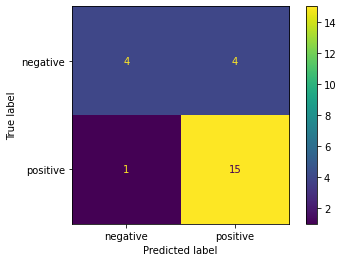

In [901]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [902]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    negative       0.50      0.80      0.62         5
    positive       0.94      0.79      0.86        19

    accuracy                           0.79        24
   macro avg       0.72      0.79      0.74        24
weighted avg       0.85      0.79      0.81        24



In [903]:
example = ["not good"]
result = model.predict(example)

print(result)


['negative']


In [904]:
import joblib
joblib.dump(model,'sentiment')

['sentiment']

In [905]:

!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

In [906]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('sentiment')
st.title('Sentiment Analysis')
ip = st.text_input("Enter the review")
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])


Overwriting app.py


In [908]:
!nohup streamlit run app.py &
url= ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'


t=2021-06-10T16:32:54+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=979c91674938b42b err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_1tlQ5gscPanVQVZGU3Xzn3V4cOi, tn_1tlQ5gZCALbDXslTeCRpiuvAFIf\n\r\n\r\nERR_NGROK_324\r\n"



PyngrokNgrokHTTPError: ignored